In [2]:
from scipy.stats import wilcoxon
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import time
from pathlib import Path
import seaborn as sns
import os
from joypy import joyplot
from matplotlib import cm

%matplotlib inline

<div class="alert alert-success">
    <h3>EVALUATING EXAMPLES</h3>
</div>

In [3]:
root_directory = 'C:/Users/bz267/Optimization results/Engineering Benchmark/Hydrology/Muskingum'

ex_list_temp = os.listdir(root_directory)
ex_list = [i for i in ex_list_temp if not i.startswith(tuple(str(i) for i in range(10)))]
print('=='*30)
print('The data for the following examples are availble:')
print('=='*30)
for i, ex_name in enumerate(ex_list):
    print('[%d] %s'%((i+1), ex_name))
print('--'*25)

The data for the following examples are availble:
[1] Example_1
[2] Example_2
--------------------------------------------------


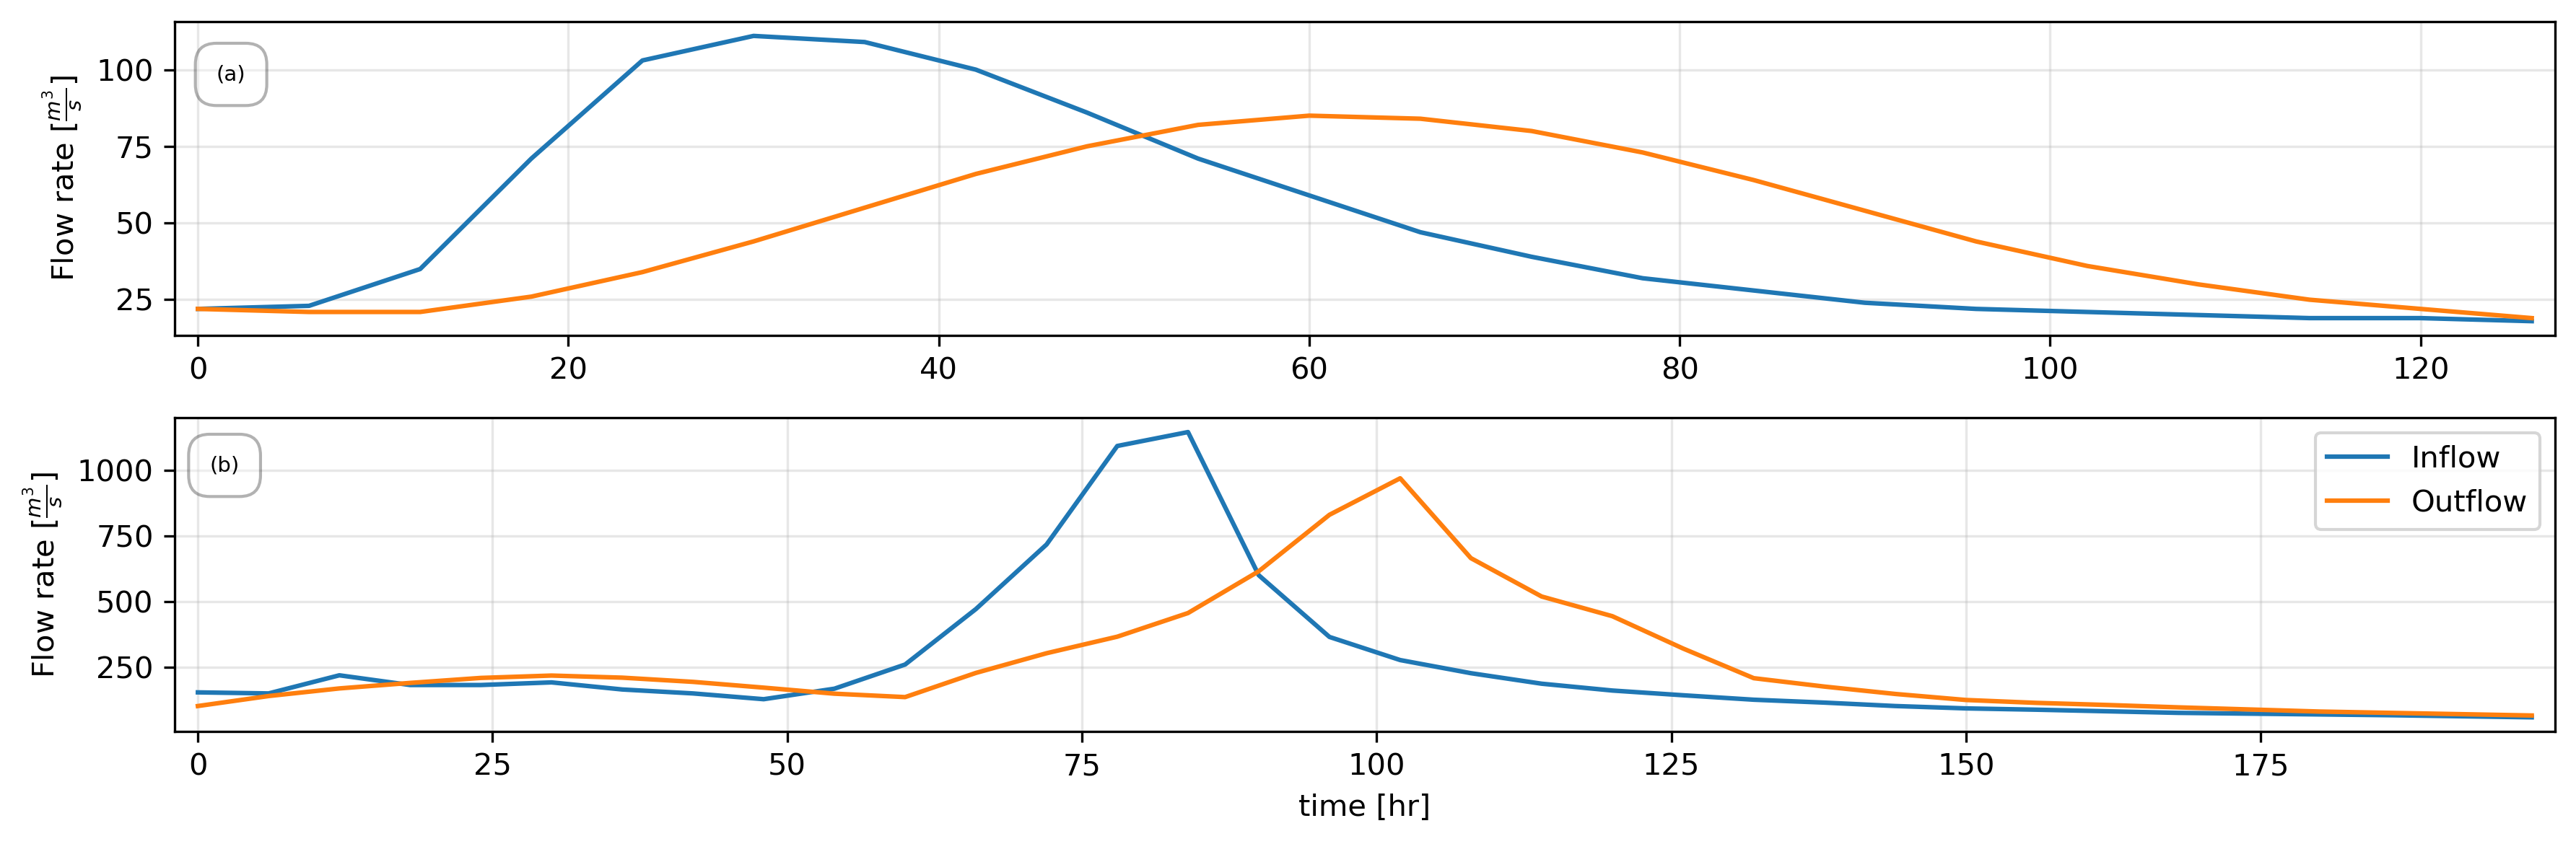

In [90]:
db0 = pd.read_csv('wilson.csv').astype(float)
db1 = pd.read_csv('wye.csv').astype(float)

fig = plt.figure(figsize=(12, 4), dpi = 300)
subplot_lables = ['(a)', '(b)']

for index_ex in range(2):
    db = eval('db%d'%index_ex)
    t = np.array(db.t)
    I = np.array(db.I)
    O_obs = np.array(db.O)
    S = np.zeros(len(I))
    O_sim = np.zeros(len(O_obs))
    if index_ex==0:
        t_hr = t/3600
    else:
        t_hr = t
    
    fig = plt.subplot(2, 1, index_ex+1)
    fig = plt.plot(t_hr, I, label='Inflow')
    fig = plt.plot(t_hr, O_obs, label='Outflow')
    fig = plt.ylabel(r'Flow rate [$\frac{m^{3}}{s}$]', )
    if index_ex!=0:
        fig = plt.legend()
        fig = plt.xlabel(r'time [hr]', )
    fig = plt.grid(alpha=.3)
    fig = plt.margins(x= .01, y=.05)
    loc, lab = plt.yticks()
    x_loc, y_loc = 1, db.iloc[:,1:].max().max()*.87
    fig = plt.annotate(text = subplot_lables[index_ex], xy = (x_loc, y_loc),fontsize=7,
                   bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=1', alpha=.3))
fig = plt.tight_layout()
folder_name = '/0Summary result/Plots/'
output_dir = Path(root_directory+folder_name)
output_dir.mkdir(parents=True, exist_ok=True)
file_name = 'flows.png'
fig = plt.savefig(output_dir / file_name)

<div class="alert alert-success">
    <h4>Example 1 - Wilson</h4>
</div>

In [3]:
root_directory = 'C:/Users/bz267/Optimization results/Engineering Benchmark/Hydrology/Muskingum'
print('=='*30)
print('The follwing algorithms are to be evaluted in this sessin:')
print('=='*30)
for ex_name in ex_list:
    print('--'*30)
    print('Example: %s'%ex_name)
    print('--'*30)
    folder_name = '/%s/'%ex_name
    outter_dir = root_directory+folder_name
    file_list = os.listdir(outter_dir)
    alg_names = [i.split(sep='.')[0].removesuffix('_result') for i in file_list if not i[0].isdigit()]
    for i, alg_name in enumerate(alg_names):
        print('[%d] %s'%((i+1), alg_name))
    print('--'*30, '\n')

The follwing algorithms are to be evaluted in this sessin:
------------------------------------------------------------
Example: Example_1
------------------------------------------------------------
[1] BA
[2] BBO
[3] CA
[4] CSA
[5] DE
[6] FA
[7] FPA
[8] GA
[9] GSA
[10] IWO
[11] PR
[12] PSO
[13] PS
[14] SA
[15] SCA
[16] SFAL
[17] SOS
[18] SSA
[19] TLBO
[20] WCS
------------------------------------------------------------ 

------------------------------------------------------------
Example: Example_2
------------------------------------------------------------
[1] BA
[2] BBO
[3] CA
[4] CSA
[5] DE
[6] FA
[7] FPA
[8] GA
[9] GSA
[10] IWO
[11] PR
[12] PSO
[13] PS
[14] SA
[15] SCA
[16] SFAL
[17] SOS
[18] SSA
[19] TLBO
[20] WCS
------------------------------------------------------------ 



In [4]:
for ex_name in ex_list:
    folder_name = '/%s/'%ex_name
    outter_dir = root_directory+folder_name
    of_db = pd.DataFrame(columns=alg_names)
    nfe_db = pd.DataFrame(columns=alg_names)
    for alg_name in alg_names:
        file_name = '%s_result.csv'%(alg_name)
        db = pd.read_csv(outter_dir+file_name)
        of_db[alg_name] = db['best_OF']
        nfe_db[alg_name] = db['NFE']
    exec('of_db_%s = of_db'%ex_name)
    exec('nfe_db_%s = nfe_db'%ex_name)

In [6]:
std_result = pd.DataFrame(columns=alg_names)
mean_result = pd.DataFrame(columns=alg_names)
nfe_result = pd.DataFrame(columns=alg_names)
index = pd.Index(ex_list)
for ex_name in ex_list:
    db = eval('of_db_%s'%ex_name)
    nfe_db = eval('nfe_db_%s'%ex_name)
    std_temp = pd.DataFrame(db.std(numeric_only=True)).transpose()
    mean_temp = pd.DataFrame(db.mean(numeric_only=True)).transpose()
    nfe_temp = pd.DataFrame(nfe_db.mean(numeric_only=True)).transpose()
    std_result = pd.concat((std_result, std_temp), axis=0, ignore_index=True)
    mean_result = pd.concat((mean_result, mean_temp), axis=0, ignore_index=True)
    nfe_result = pd.concat((nfe_result, nfe_temp), axis=0, ignore_index=True)
std_result = std_result.set_index(index)
mean_result = mean_result.set_index(index)
nfe_result = nfe_result.set_index(index)

In [6]:
mean_result.transpose()

,Example_1,Example_2
BA,45.568481,39960.446864
BBO,51.016275,40210.280387
CA,57.917507,40567.673063
CSA,36.826800,37969.436432
DE,36.767888,37944.144628
FA,121.954893,65923.519975
FPA,36.767888,37944.144628
GA,36.984552,37984.112338
GSA,49.525975,41464.334042
IWO,41.150987,38576.523739


In [7]:
std_result.transpose()

,Example_1,Example_2
BA,5.110053e+00,2.079412e+03
BBO,1.882956e+01,2.189446e+03
CA,2.022640e+01,1.682611e+03
CSA,1.057175e-01,3.511439e+01
DE,4.110948e-14,1.669219e-11
FA,5.032641e+01,2.546557e+04
FPA,4.564271e-14,7.275958e-12
GA,2.884423e-01,4.828012e+01
GSA,3.256640e+01,6.359384e+03
IWO,3.654793e+00,5.007390e+02


In [8]:
nfe_result.transpose()

,Example_1,Example_2
BA,1750000.00,1750000.0
BBO,500000.00,500000.0
CA,400000.00,400000.0
CSA,500000.00,500000.0
DE,500000.00,500000.0
FA,1125075.00,1125075.0
FPA,2000000.00,2000000.0
GA,3404240.60,3404237.8
GSA,500500.00,500500.0
IWO,1925633.95,1981735.3


In [32]:
nfe_result.transpose().rank(ascending=False)

,Example_1,Example_2
BA,8.0,8.0
BBO,16.0,16.0
CA,19.0,19.0
CSA,16.0,16.0
DE,16.0,16.0
FA,10.0,10.0
FPA,4.0,4.0
GA,1.0,1.0
GSA,13.5,13.5
IWO,5.0,5.0


In [9]:
database = mean_result
temp_storage = list()
mean_analysis = pd.DataFrame(index=database.index)
for i in range(len(database)):
    min_val = np.min(database.iloc[i])
    index = database.iloc[i]==min_val
    temp_storage.append(list(index[index].index))
mean_analysis['Best Algorithms'] = temp_storage
mean_analysis['Best result'] = database.min(axis=1)
mean_analysis['Mean of algs'] = database.mean(axis=1)
mean_analysis['std. of algs'] = database.std(axis=1)
folder_name = '/0Summary result/Stat tests/Mean & std comparision/'
output_dir = Path(root_directory+folder_name)
output_dir.mkdir(parents=True, exist_ok=True)
file_name = 'mean_analysis.csv'
mean_analysis.to_csv(output_dir / file_name)
mean_analysis

,Best Algorithms,Best result,Mean of algs,std. of algs
Example_1,[DE],36.767888,88.813823,137.261342
Example_2,[FPA],37944.144628,46840.319206,22873.905149


In [10]:
database = std_result
temp_storage = list()
std_analysis = pd.DataFrame(index=database.index)
for i in range(len(database)):
    min_val = np.min(database.iloc[i])
    index = database.iloc[i]==min_val
    temp_storage.append(list(index[index].index))
std_analysis['Best Algorithms'] = temp_storage
std_analysis['Best result'] = database.min(axis=1)
std_analysis['Mean of algs'] = database.mean(axis=1)
std_analysis['std. of algs'] = database.std(axis=1)
folder_name = '/0Summary result/Stat tests/Mean & std comparision/'
output_dir = Path(root_directory+folder_name)
output_dir.mkdir(parents=True, exist_ok=True)
file_name = 'std_analysis.csv'
std_analysis.to_csv(output_dir / file_name)
std_analysis

,Best Algorithms,Best result,Mean of algs,std. of algs
Example_1,[SOS],2.906879e-14,137.337707,545.379012
Example_2,[FPA],7.275958e-12,18035.587938,66134.668600


In [11]:
database = nfe_result
temp_storage = list()
nfe_analysis = pd.DataFrame(index=database.index)
for i in range(len(database)):
    np.argmin(database.iloc[i])
    min_val = np.min(database.iloc[i])
    index = database.iloc[i]==min_val
    temp_storage.append(list(index[index].index))
nfe_analysis['Best Algorithms'] = temp_storage
nfe_analysis['Best result'] = database.min(axis=1)
nfe_analysis['Mean of algs'] = database.mean(axis=1)
nfe_analysis['std. of algs'] = database.std(axis=1)
folder_name = '/0Summary result/Stat tests/Mean & std comparision/'
output_dir = Path(root_directory+folder_name)
output_dir.mkdir(parents=True, exist_ok=True)
file_name = 'nfe_analysis.csv'
nfe_analysis.to_csv(output_dir / file_name)
nfe_analysis

,Best Algorithms,Best result,Mean of algs,std. of algs
Example_1,[SFAL],150750.0,1.221164e+06,845858.584556
Example_2,[SFAL],150750.0,1.257033e+06,894074.702121


<div class="alert alert-success">
    <b>PLOTS</b>
</div>

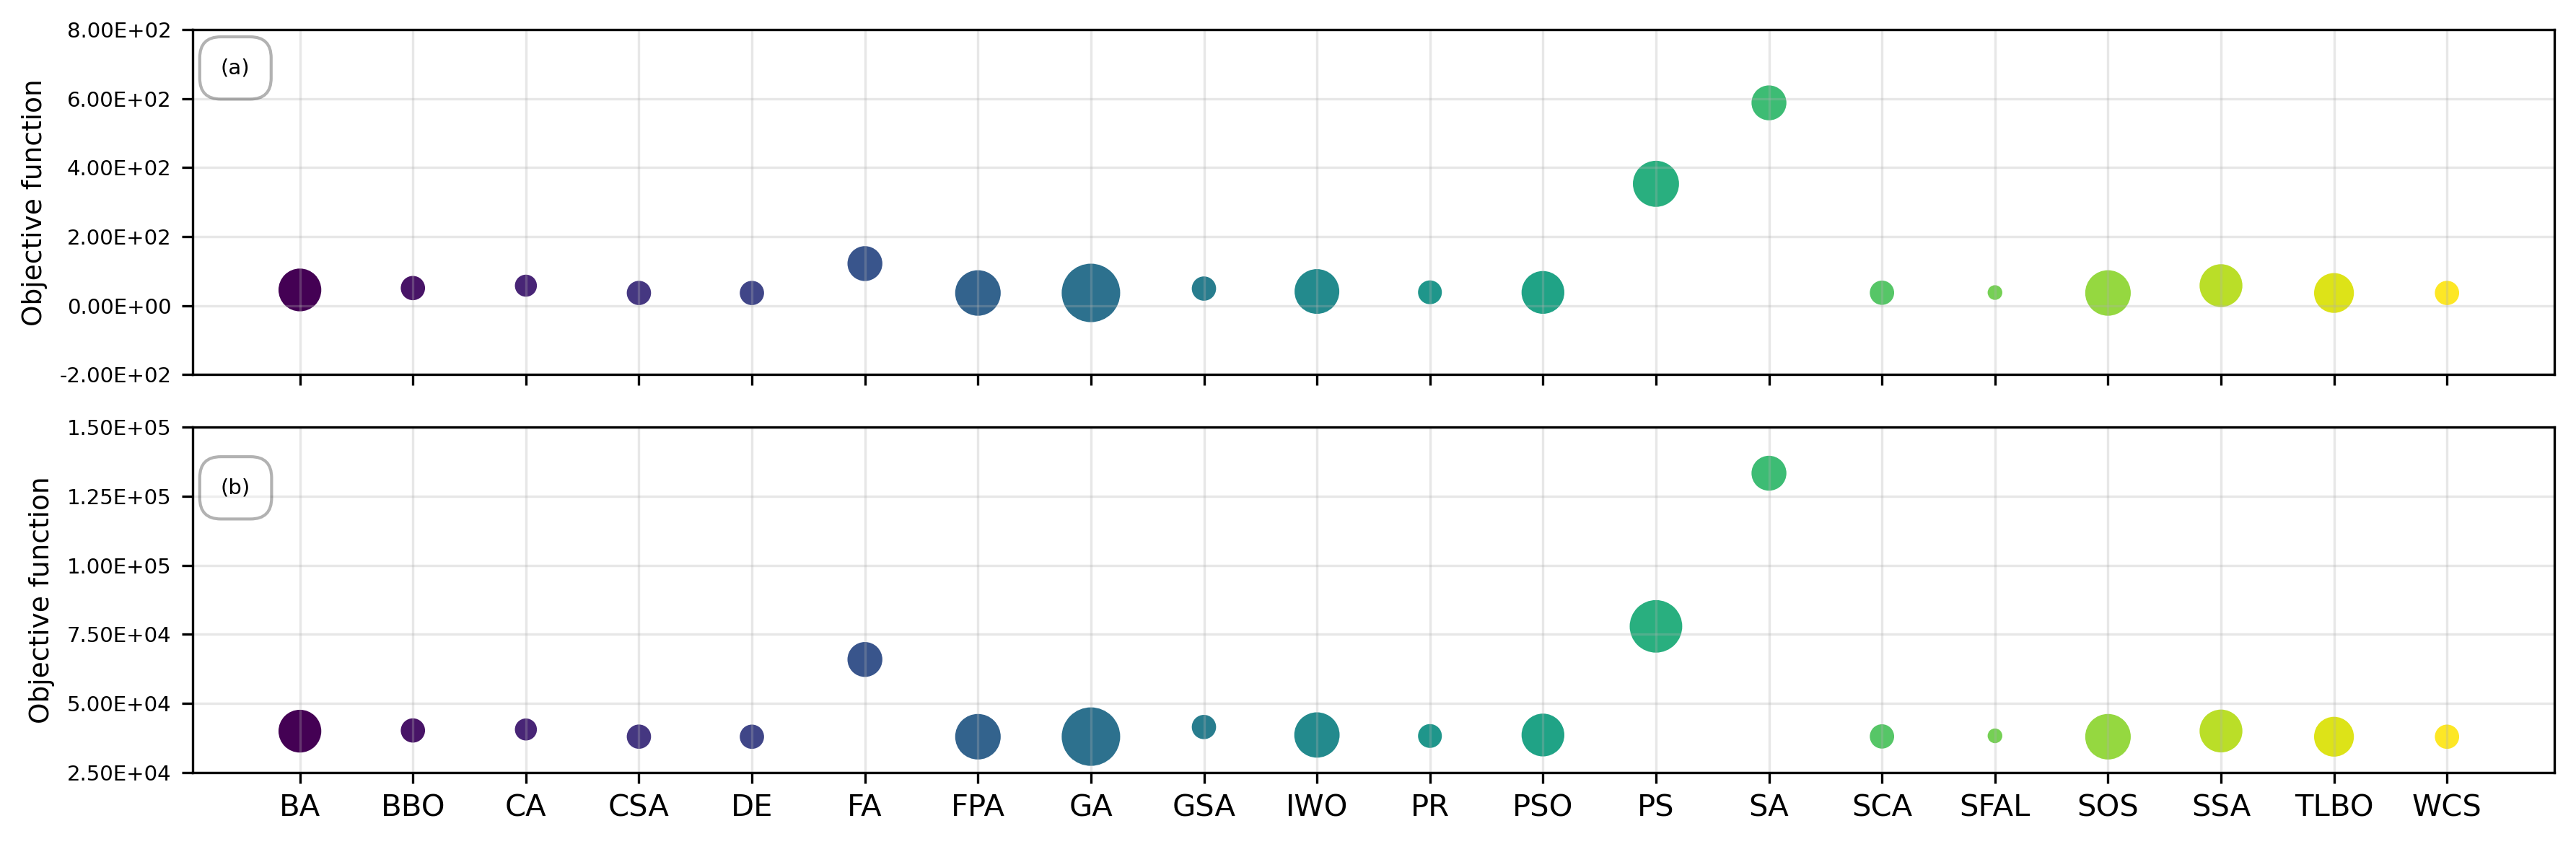

In [13]:
fig = plt.figure(figsize=(12, 4), dpi = 300)
subplot_lables = ['(a)', '(b)']
for index_ex in range(2):
    data = pd.DataFrame(nfe_result.iloc[index_ex]).reset_index().rename({'index':'alg_name', 'Example_%s'%(index_ex+1):'NFE'},
                                                                        axis=1)
    data['OF'] = mean_result.iloc[index_ex].values
    c = plt.cm.viridis(np.linspace(0, 1, len(data)))
    fig = plt.subplot(2, 1, index_ex+1)
    fig = plt.scatter(data['alg_name'], y=data['OF'], s=data['NFE']/1e4, c=c)
    if index_ex==0:
        fig = plt.xticks(ticks=alg_names, labels=[])
    fig = plt.grid(alpha=.3)
    fig = plt.margins(y=.067)
    loc, lab = plt.yticks()
    fig = plt.yticks(ticks=loc, labels=['%.2E'%i for i in loc], fontsize=7)
    fig = plt.ylabel('Objective function', fontsize=9)
    x_loc, y_loc = -.7, loc.max()*.84
    fig = plt.annotate(text = subplot_lables[index_ex], xy = (x_loc, y_loc),fontsize=7,
                   bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=1', alpha=.3))
fig = plt.tight_layout()
folder_name = '/0Summary result/Plots/'
output_dir = Path(root_directory+folder_name)
output_dir.mkdir(parents=True, exist_ok=True)
file_name = 'of_vs_NFE.png'
fig = plt.savefig(output_dir / file_name)

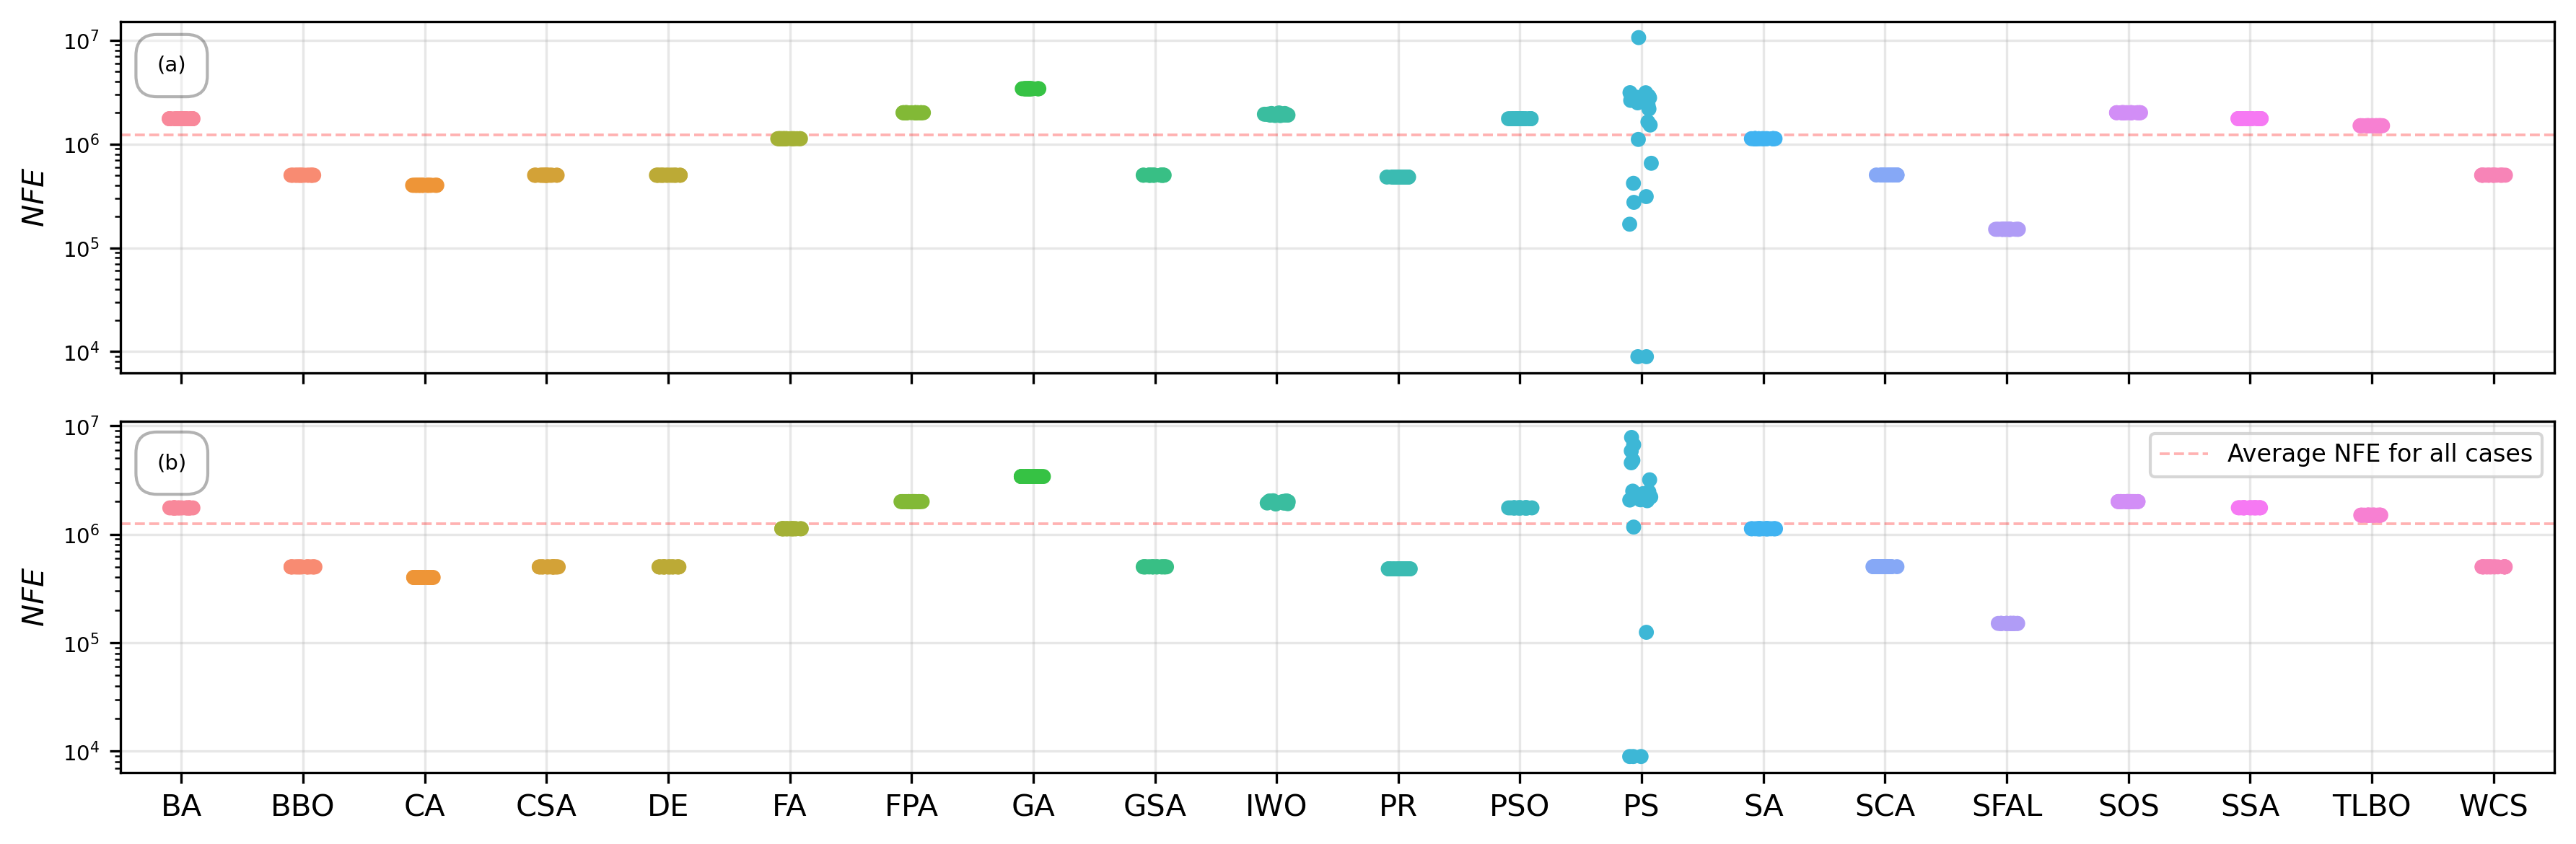

In [20]:
fig = plt.figure(figsize=(12,4), dpi=300)
subplot_lables = ['(a)', '(b)']
for i, ex_name in enumerate(ex_list):
    fig = plt.subplot(2, 1, i+1)
    fig = sns.stripplot(data=eval('nfe_db_%s'%ex_name))
    y_tickes = fig.get_yticks()
    x_tickes = fig.get_xticks()
    fig = plt.grid(alpha=.3)
    fig = plt.ylabel(r'$NFE$')
    new_y_ticks = ['%.1E'%i for i in y_tickes]
    fig = plt.yticks(ticks=y_tickes, labels=new_y_ticks, fontsize=7)
    x_loc, y_loc = x_tickes.min()-.2, y_tickes.max()*.4
    fig = plt.annotate(text = subplot_lables[i], xy = (x_loc, y_loc),fontsize=7,
                   bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=1', alpha=.3))
    if i%2==0:
        fig = plt.xticks(ticks=x_tickes, labels=[])
    fig = plt.yscale('log')
    fig = plt.axhline(nfe_result.mean(axis=1)[i], ls='--', c='r', alpha=.3, lw=.9, label='Average NFE for all cases')
    if i%2!=0:
        fig = plt.legend(loc='upper right', fancybox=True, fontsize=8)
fig = plt.tight_layout()
folder_name = '/0Summary result/Plots/Strip plot/'
output_dir = Path(root_directory+folder_name)
output_dir.mkdir(parents=True, exist_ok=True)
file_name = 'nfe_stripplot.png'
fig = plt.savefig(output_dir / file_name)

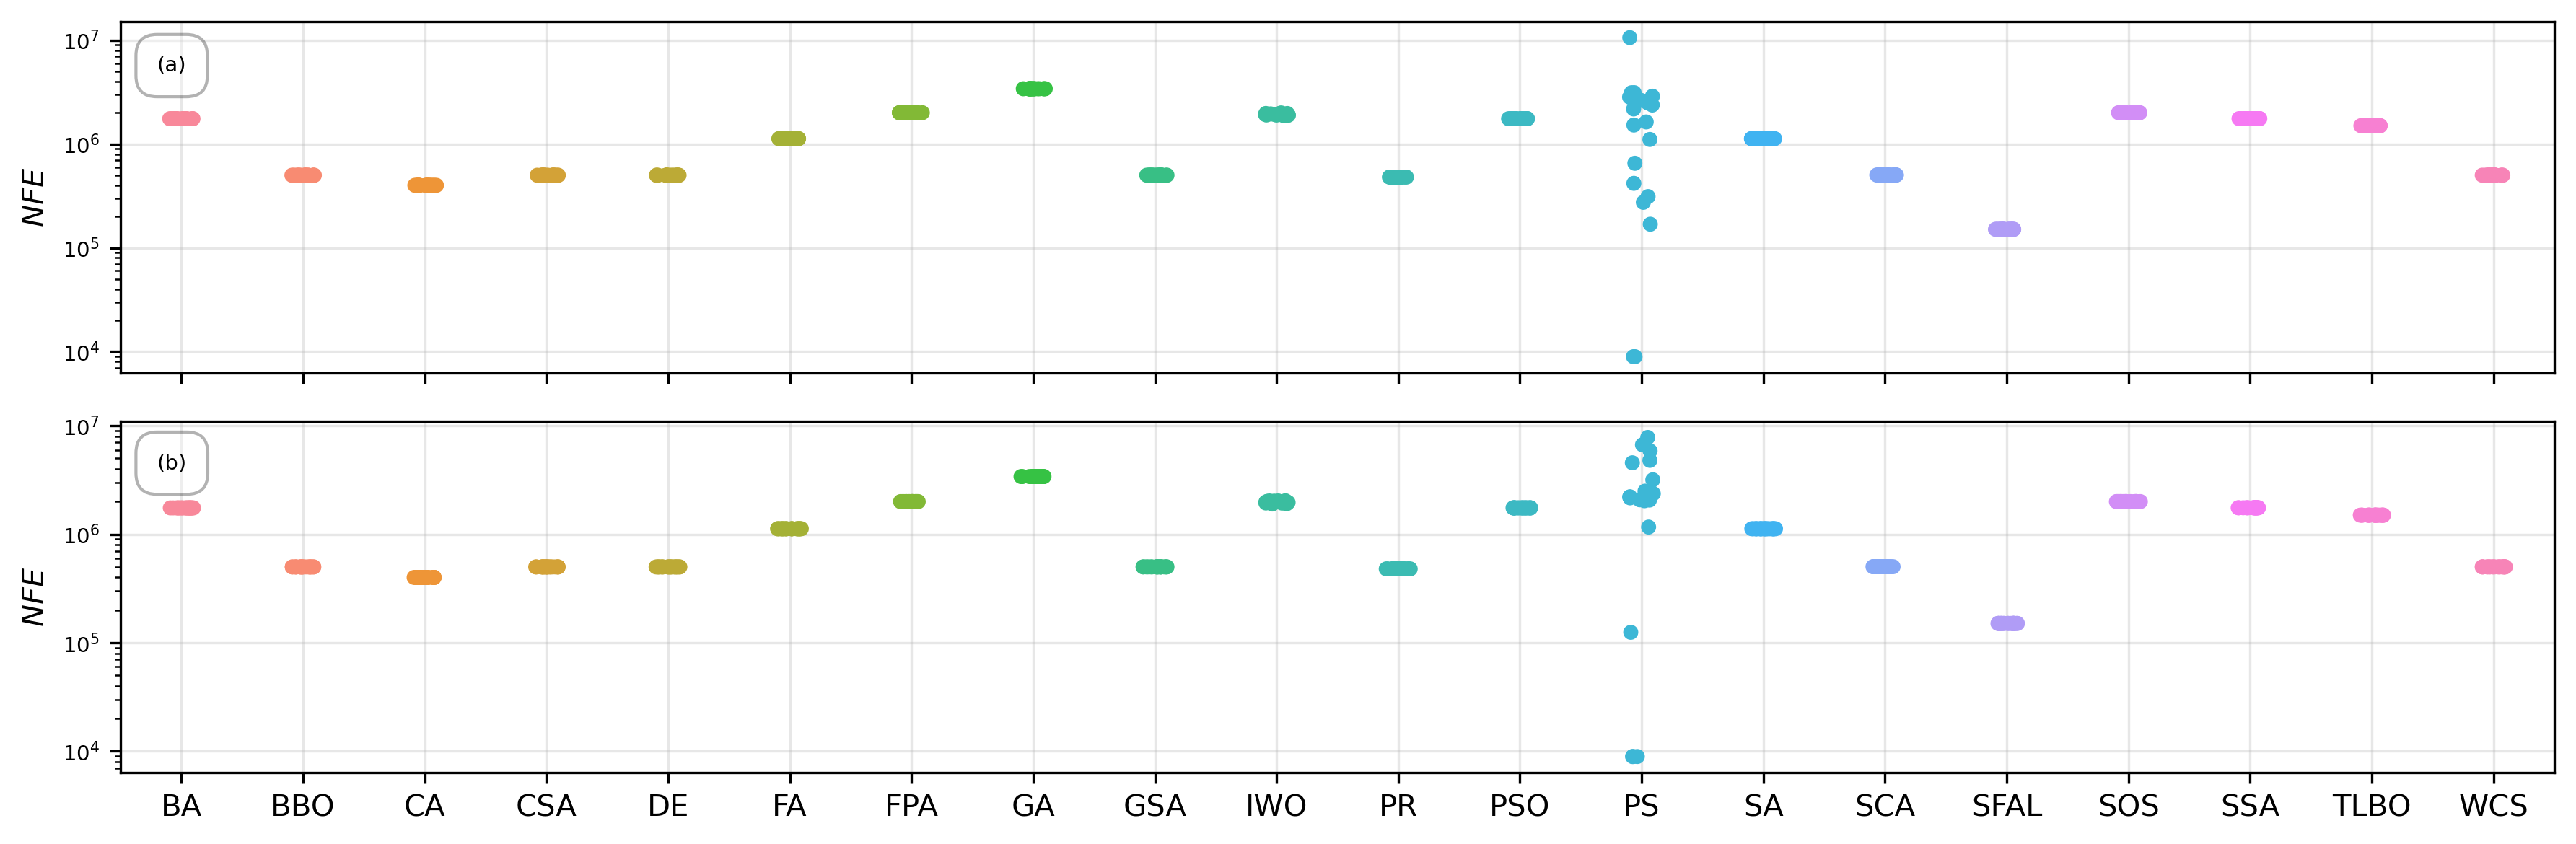

In [15]:
fig = plt.figure(figsize=(12,4), dpi=300)
subplot_lables = ['(a)', '(b)']
for i, ex_name in enumerate(ex_list):
    fig = plt.subplot(2, 1, i+1)
    fig = sns.stripplot(data=eval('nfe_db_%s'%ex_name))
    y_tickes = fig.get_yticks()
    x_tickes = fig.get_xticks()
    fig = plt.grid(alpha=.3)
    fig = plt.ylabel(r'$NFE$')
    new_y_ticks = ['%.1E'%i for i in y_tickes]
    fig = plt.yticks(ticks=y_tickes, labels=new_y_ticks, fontsize=7)
    x_loc, y_loc = x_tickes.min()-.2, y_tickes.max()*.4
    fig = plt.annotate(text = subplot_lables[i], xy = (x_loc, y_loc),fontsize=7,
                   bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=1', alpha=.3))
    if i%2==0:
        fig = plt.xticks(ticks=x_tickes, labels=[])
    fig = plt.yscale('log')
fig = plt.tight_layout()
folder_name = '/0Summary result/Plots/Strip plot/'
output_dir = Path(root_directory+folder_name)
output_dir.mkdir(parents=True, exist_ok=True)
file_name = 'nfe_stripplot.png'
fig = plt.savefig(output_dir / file_name)

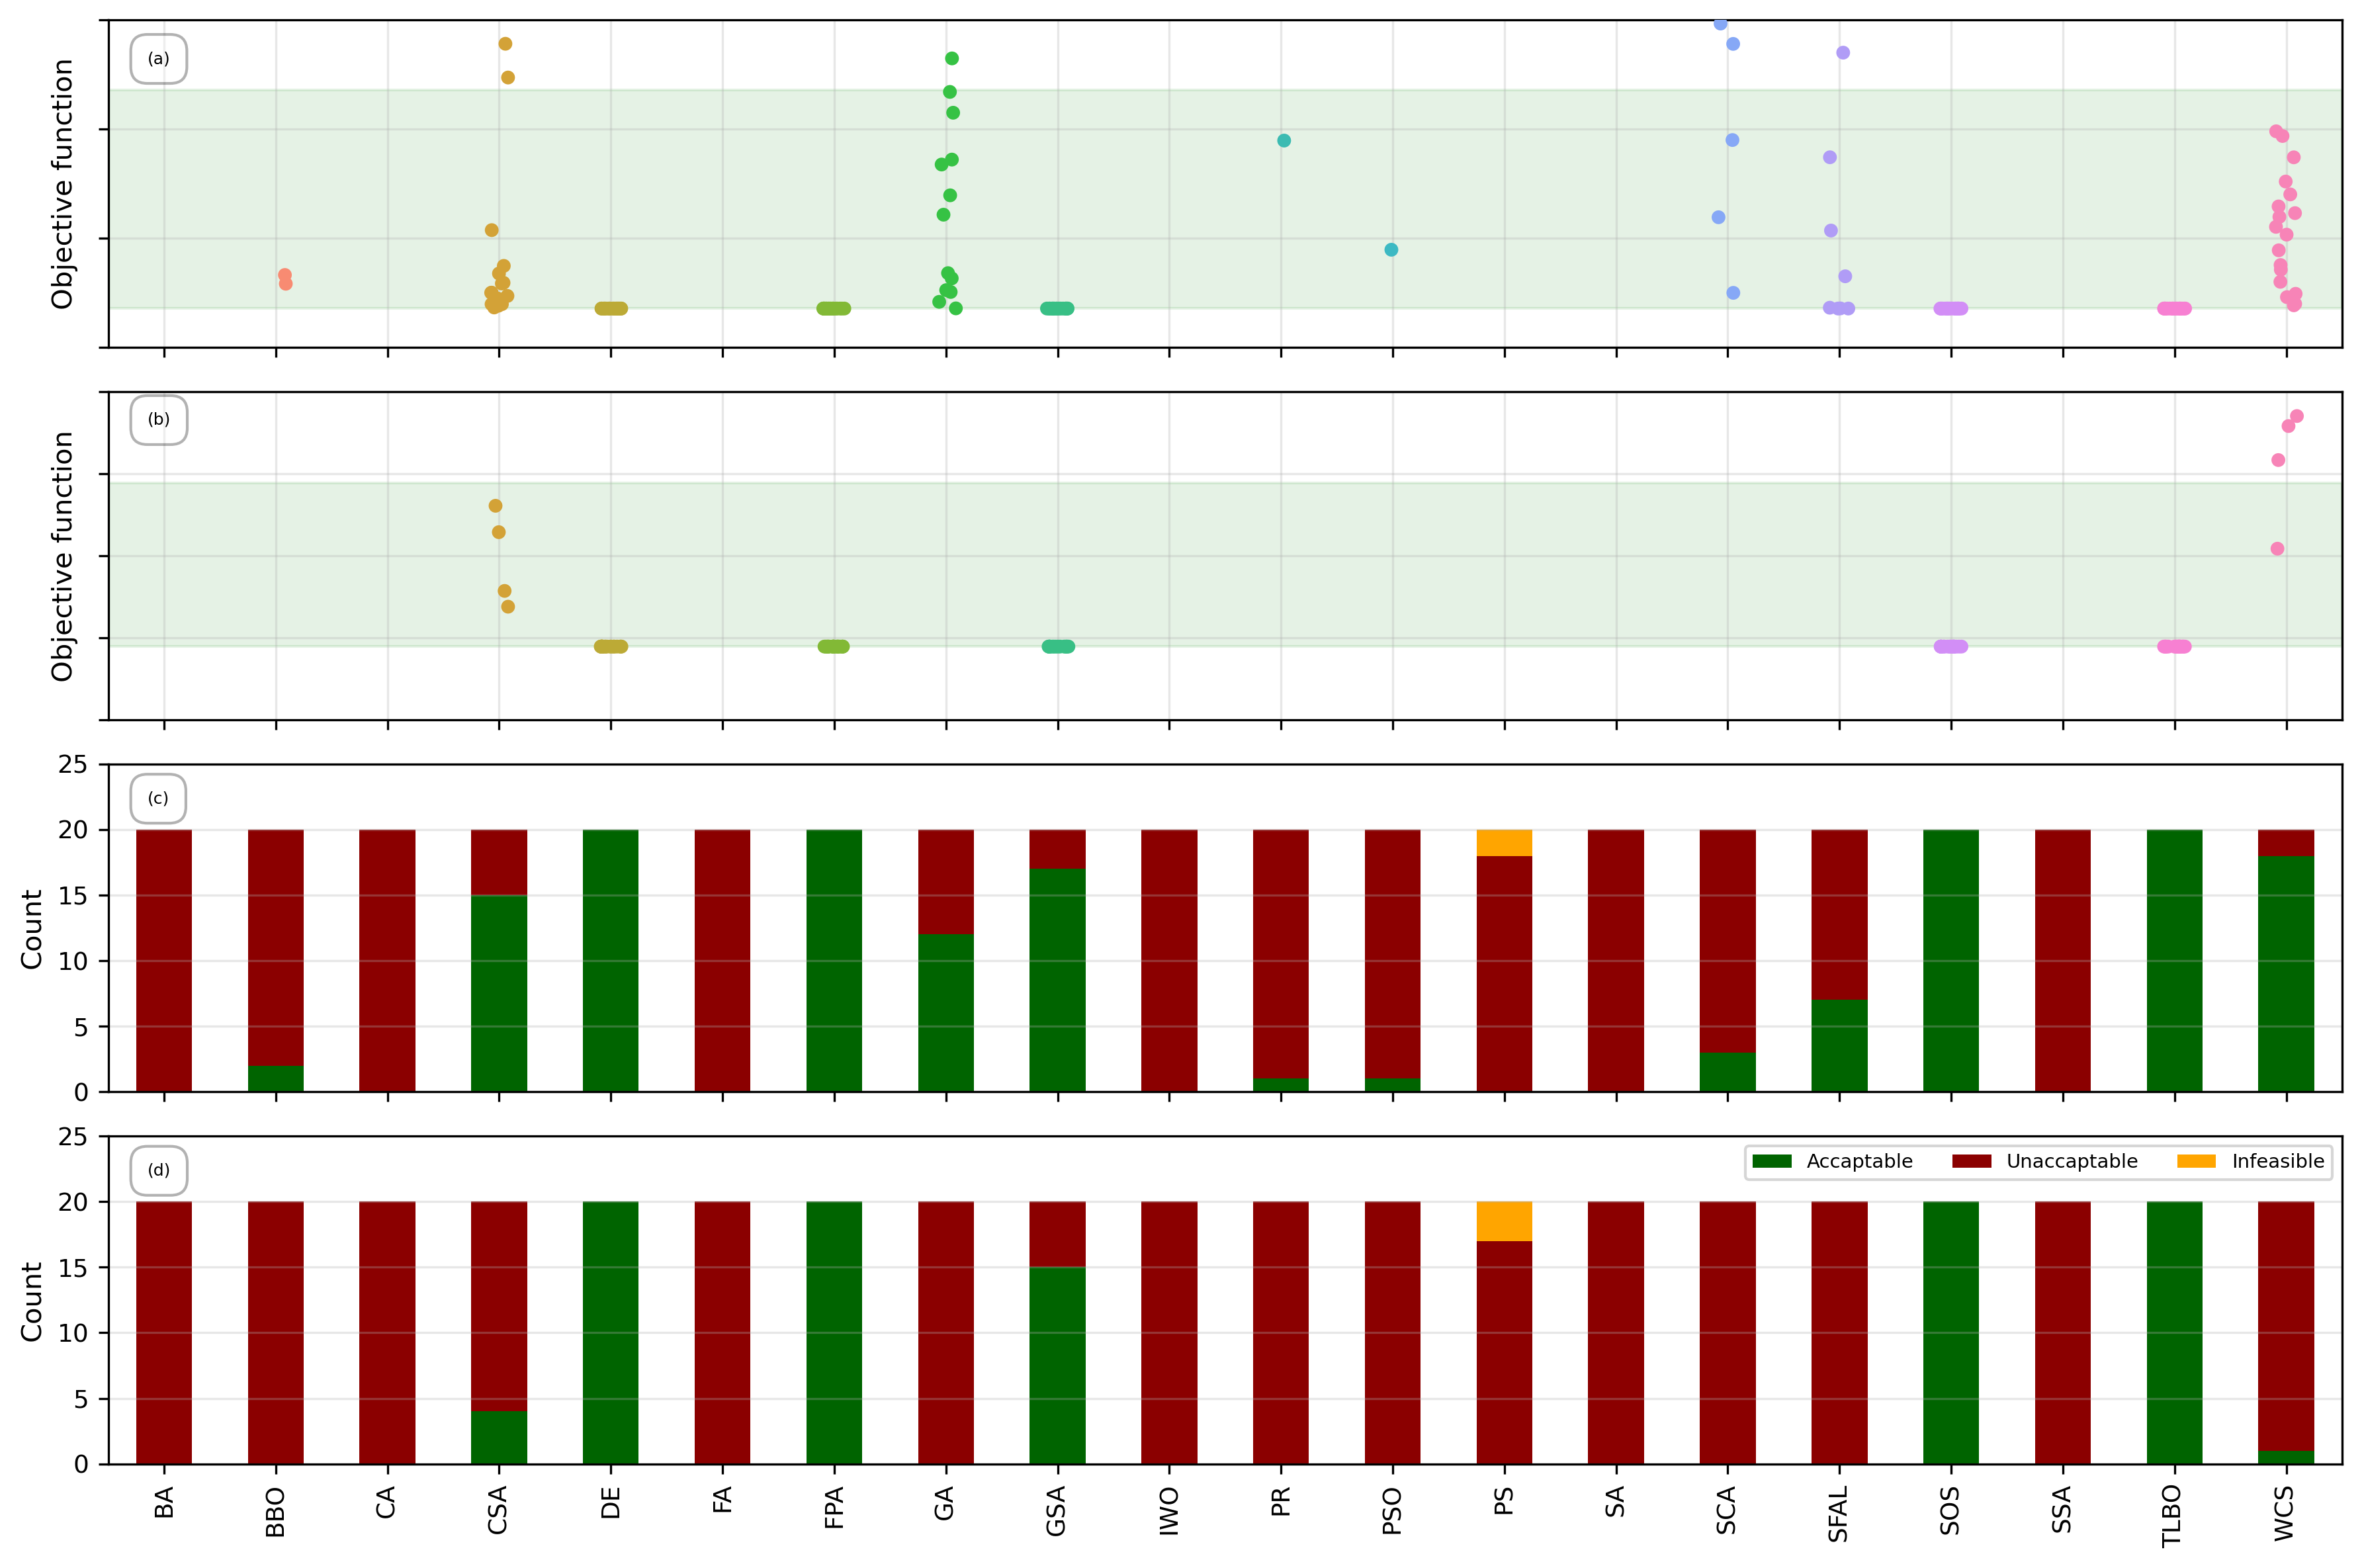

In [17]:
threshold = 1e-1
num_runs = 20
num_algs = len(alg_names)
top_accaptable_span = (np.min(mean_result, axis=1)+threshold)

fig = plt.figure(figsize=(12,8), dpi=300)
subplot_lables = ['(a)', '(b)']
for i, ex_name in enumerate(ex_list):
    bottom_accaptable_span = np.min(mean_result, axis=1)
    top_accaptable_span = (np.min(mean_result, axis=1)+threshold)
    bottom_view_span = (bottom_accaptable_span)-.01
    top_view_span = top_accaptable_span+.01
    fig = plt.subplot(4, 1, i+1)
    fig = sns.stripplot(data=eval('of_db_%s'%ex_name))
    plt.ylim(bottom_view_span[i], top_view_span[i])
    y_tickes = fig.get_yticks()
    x_tickes = fig.get_xticks()
    fig = plt.ylim(bottom_view_span[i], top_view_span[i])
    fig = plt.axhspan(bottom_accaptable_span[i], top_accaptable_span[i], color='g', alpha=.1)
    fig = plt.grid(alpha=.3)
    fig = plt.ylabel('Objective function')
    new_y_ticks = ['%.1E'%i for i in y_tickes]
    fig = plt.yticks(ticks=y_tickes, labels=[], fontsize=7)
    x_loc, y_loc = x_tickes.min()-.15, np.max(y_tickes)-.02
    fig = plt.annotate(text = subplot_lables[i], xy = (x_loc, y_loc),fontsize=6,
                   bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=1', alpha=.3))
    fig = plt.xticks(ticks=x_tickes, labels=[])

i = 0
a = eval('of_db_Example_%d<=top_accaptable_span[i]'%(i+1)).sum(axis=0)
b = eval('of_db_Example_%d>top_accaptable_span[i]'%(i+1)).sum(axis=0)
c = num_runs - (a+b)
db_temp_0 = pd.DataFrame({'Accaptable': a, 'Unaccaptable': b, 'Infeasible': c})
db_temp_0.reset_index(inplace=True)
db_temp_0.rename({'index':'Algortihm'}, axis=1, inplace=True)

i = 1
a = eval('of_db_Example_%d<=top_accaptable_span[i]'%(i+1)).sum(axis=0)
b = eval('of_db_Example_%d>top_accaptable_span[i]'%(i+1)).sum(axis=0)
c = num_runs - (a+b)
db_temp_1 = pd.DataFrame({'Accaptable': a, 'Unaccaptable': b, 'Infeasible': c})
db_temp_1.reset_index(inplace=True)
db_temp_1.rename({'index':'Algortihm'}, axis=1, inplace=True)


fig = plt.subplot(4, 1, 3)
fig = db_temp_0.plot(kind='bar', stacked=True, use_index=False, fontsize=9,
                     color=['darkgreen', 'darkred', 'orange'], ax = plt.gca(),
                     legend=False)
fig = plt.grid(axis='y', alpha=.3)
fig = plt.xticks(np.arange(num_algs), [])
fig = plt.ylabel('Count')
fig = plt.annotate(text = '(c)', xy = (-.15, 22),fontsize=6,
                   bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=1', alpha=.3))
fig = plt.ylim(top=25)

fig = plt.subplot(4, 1, 4)
fig = db_temp_1.plot(kind='bar', stacked=True, use_index=False, fontsize=9,
                   color=['darkgreen', 'darkred', 'orange'], ax = plt.gca())
fig = plt.xticks(np.arange(num_algs), db_temp_1['Algortihm'])
fig = plt.legend(ncol=3, fontsize=7)
fig = plt.ylim(top=25)
fig = plt.grid(axis='y',alpha=.3)
fig = plt.ylabel('Count')
fig = plt.annotate(text = '(d)', xy = (-.15, 22),fontsize=6,
                   bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=1', alpha=.3))
    
fig = plt.tight_layout()
folder_name = '/0Summary result/Plots/Strip plot/'
output_dir = Path(root_directory+folder_name)
output_dir.mkdir(parents=True, exist_ok=True)
file_name = 'of__threshold_stripplot.png'
fig = plt.savefig(output_dir / file_name)

<div class='alert alert-warning'>
    Violin Plot
</div>

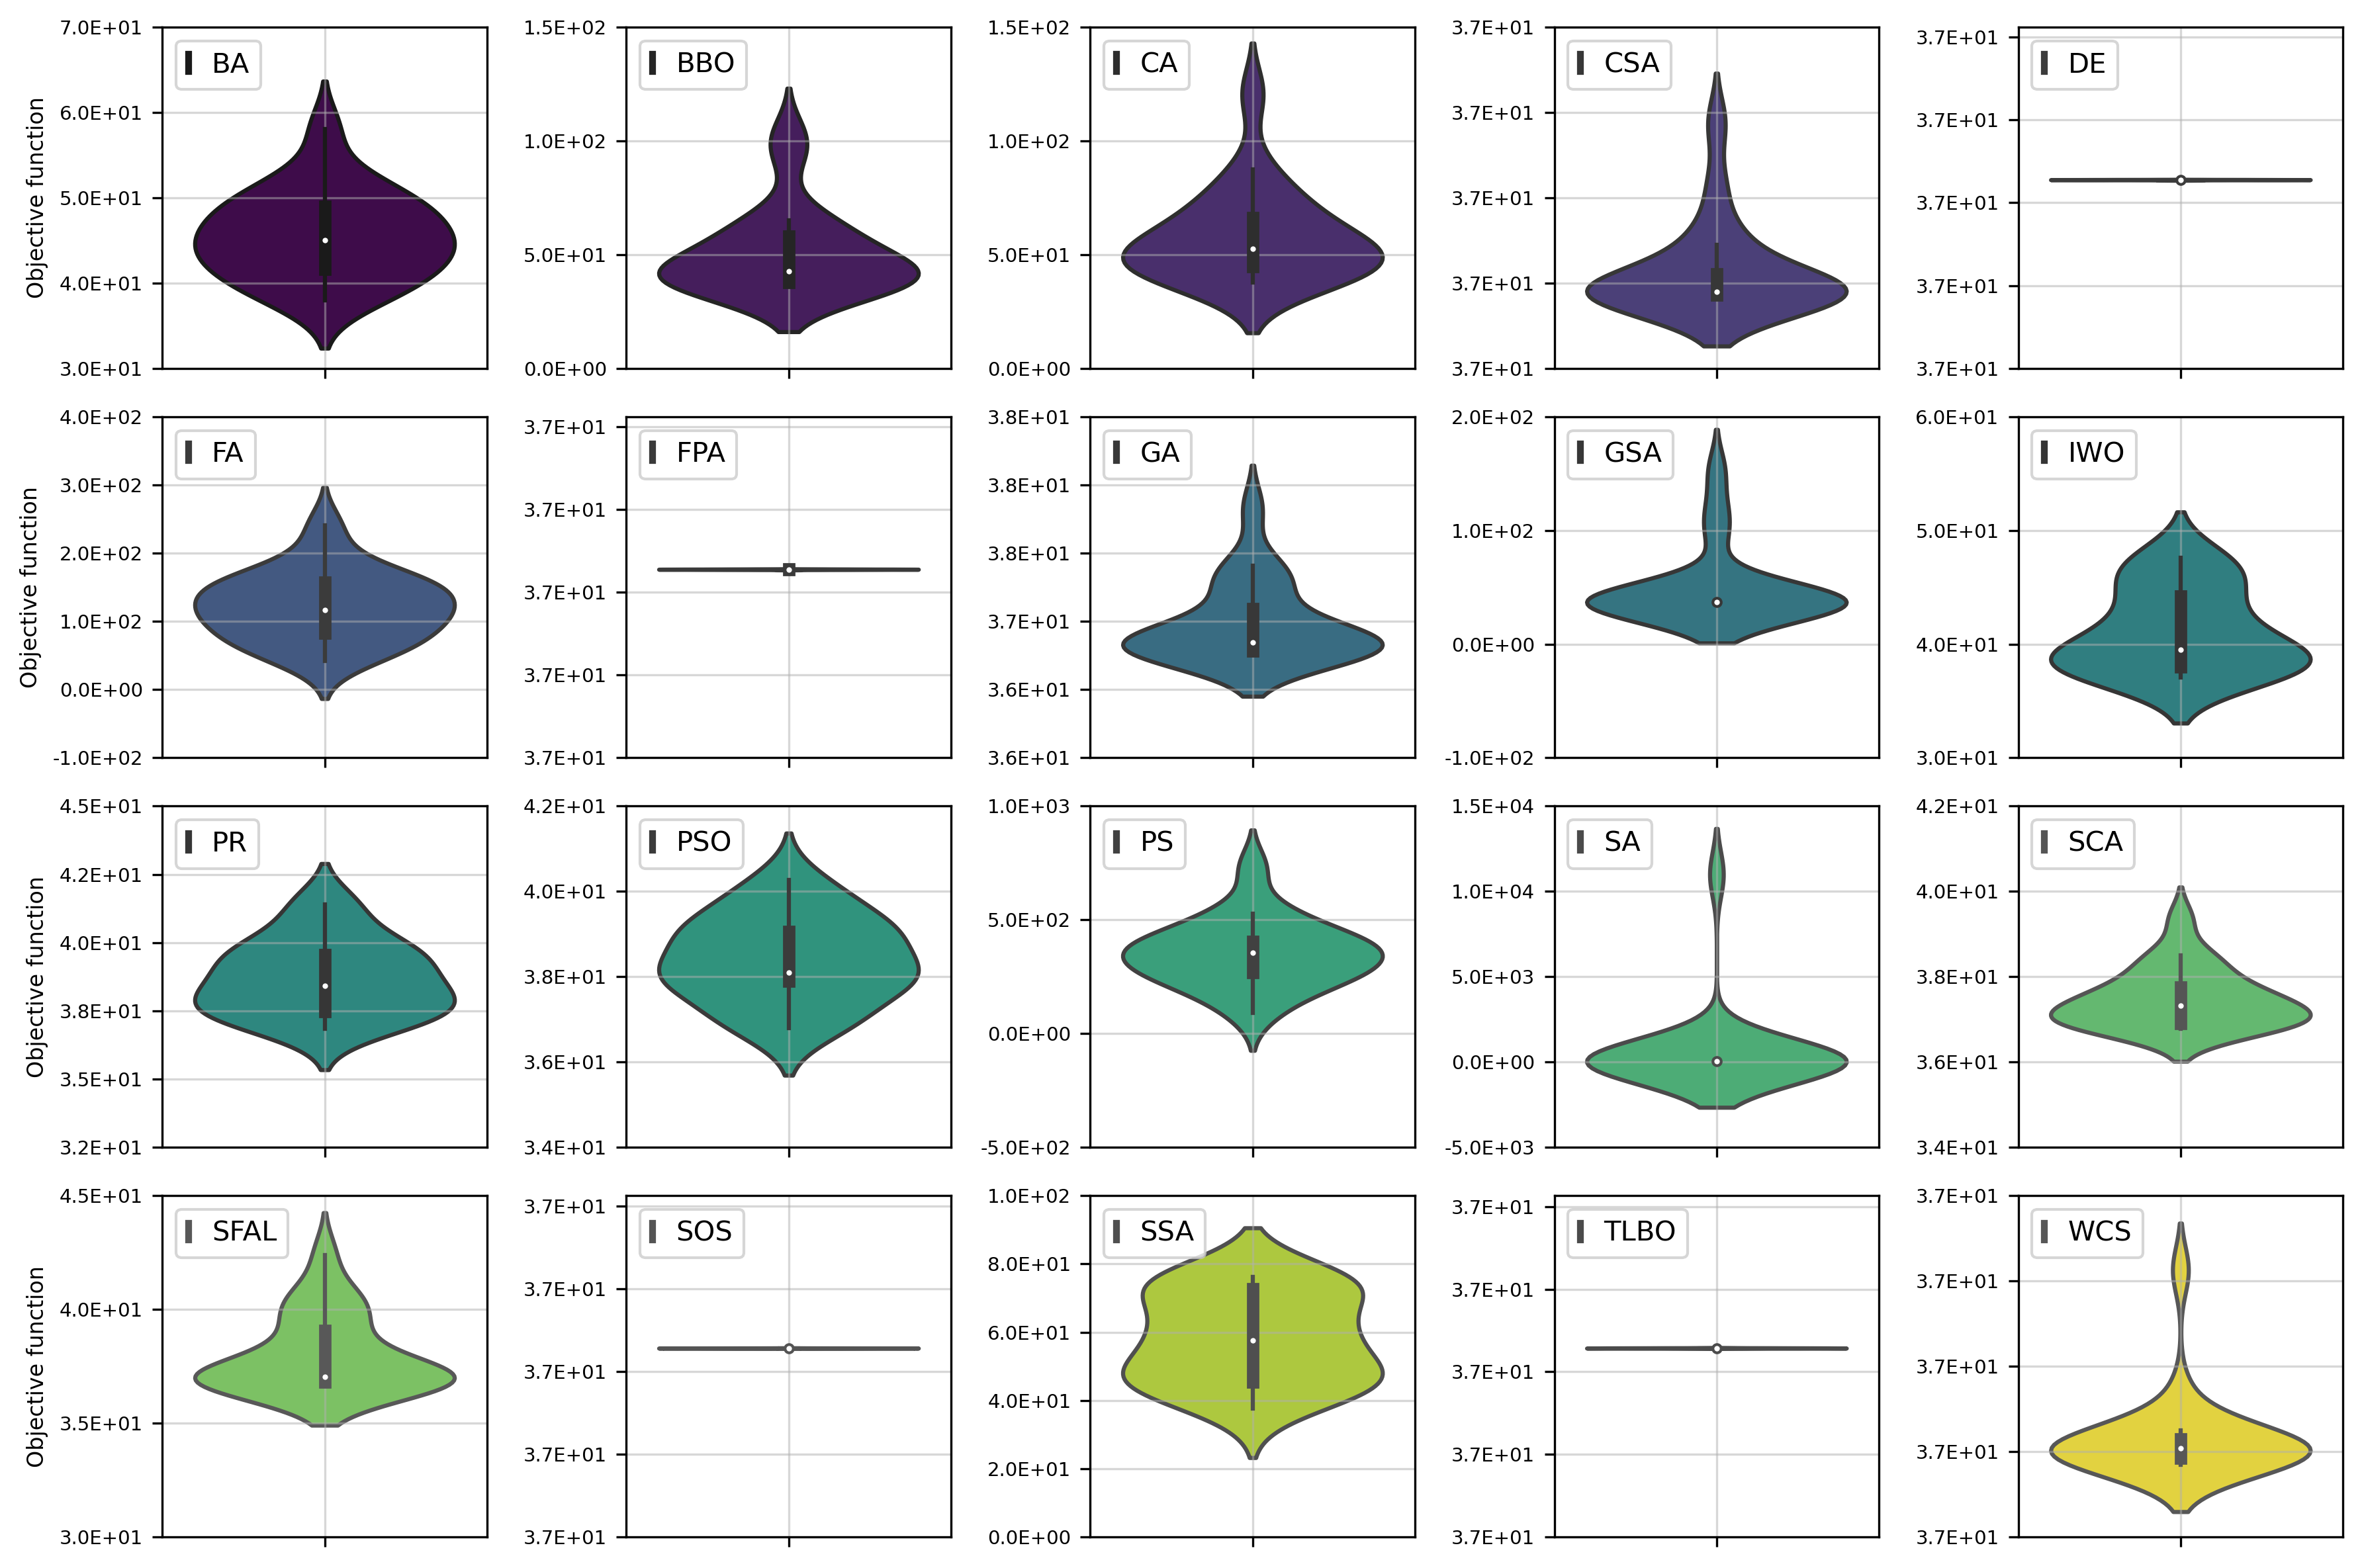

In [21]:
db_name = 'Example_1'
db = eval('of_db_%s'%db_name)
fig = plt.figure(figsize=(12, 8), dpi=300)
num_cols = 5
a, b = divmod(len(alg_names), num_cols)
num_row = a+1 if b!=0 else a
cm = plt.cm.viridis(np.linspace(0,1, len(alg_names)))
for i, alg_name in enumerate(alg_names):
    fig = plt.subplot(num_row, num_cols, i+1)
    fig = sns.violinplot(data=db[alg_name], color=cm[i])
    y_tickes = fig.get_yticks()
    x_tickes = fig.get_xticks()
    new_y_ticks = ['%.1E'%i for i in y_tickes]
    fig = plt.xticks(ticks= x_tickes, labels=[])
    fig = plt.yticks(ticks=y_tickes, labels=new_y_ticks, fontsize=7)
    fig = plt.grid(alpha=.5)
    fig = plt.legend(['%s'%alg_name], handlelength=0.1, frameon=True, loc = 'upper left', fancybox=True)
    if i%num_cols==0:
        fig = plt.ylabel('Objective function', fontsize=8)    
plt.tight_layout()
folder_name = '/0Summary result/Plots/Violin plot/'
output_dir = Path(root_directory+folder_name)
output_dir.mkdir(parents=True, exist_ok=True)
file_name = '%s_of_violinplot.png'%db_name
fig = plt.savefig(output_dir / file_name)

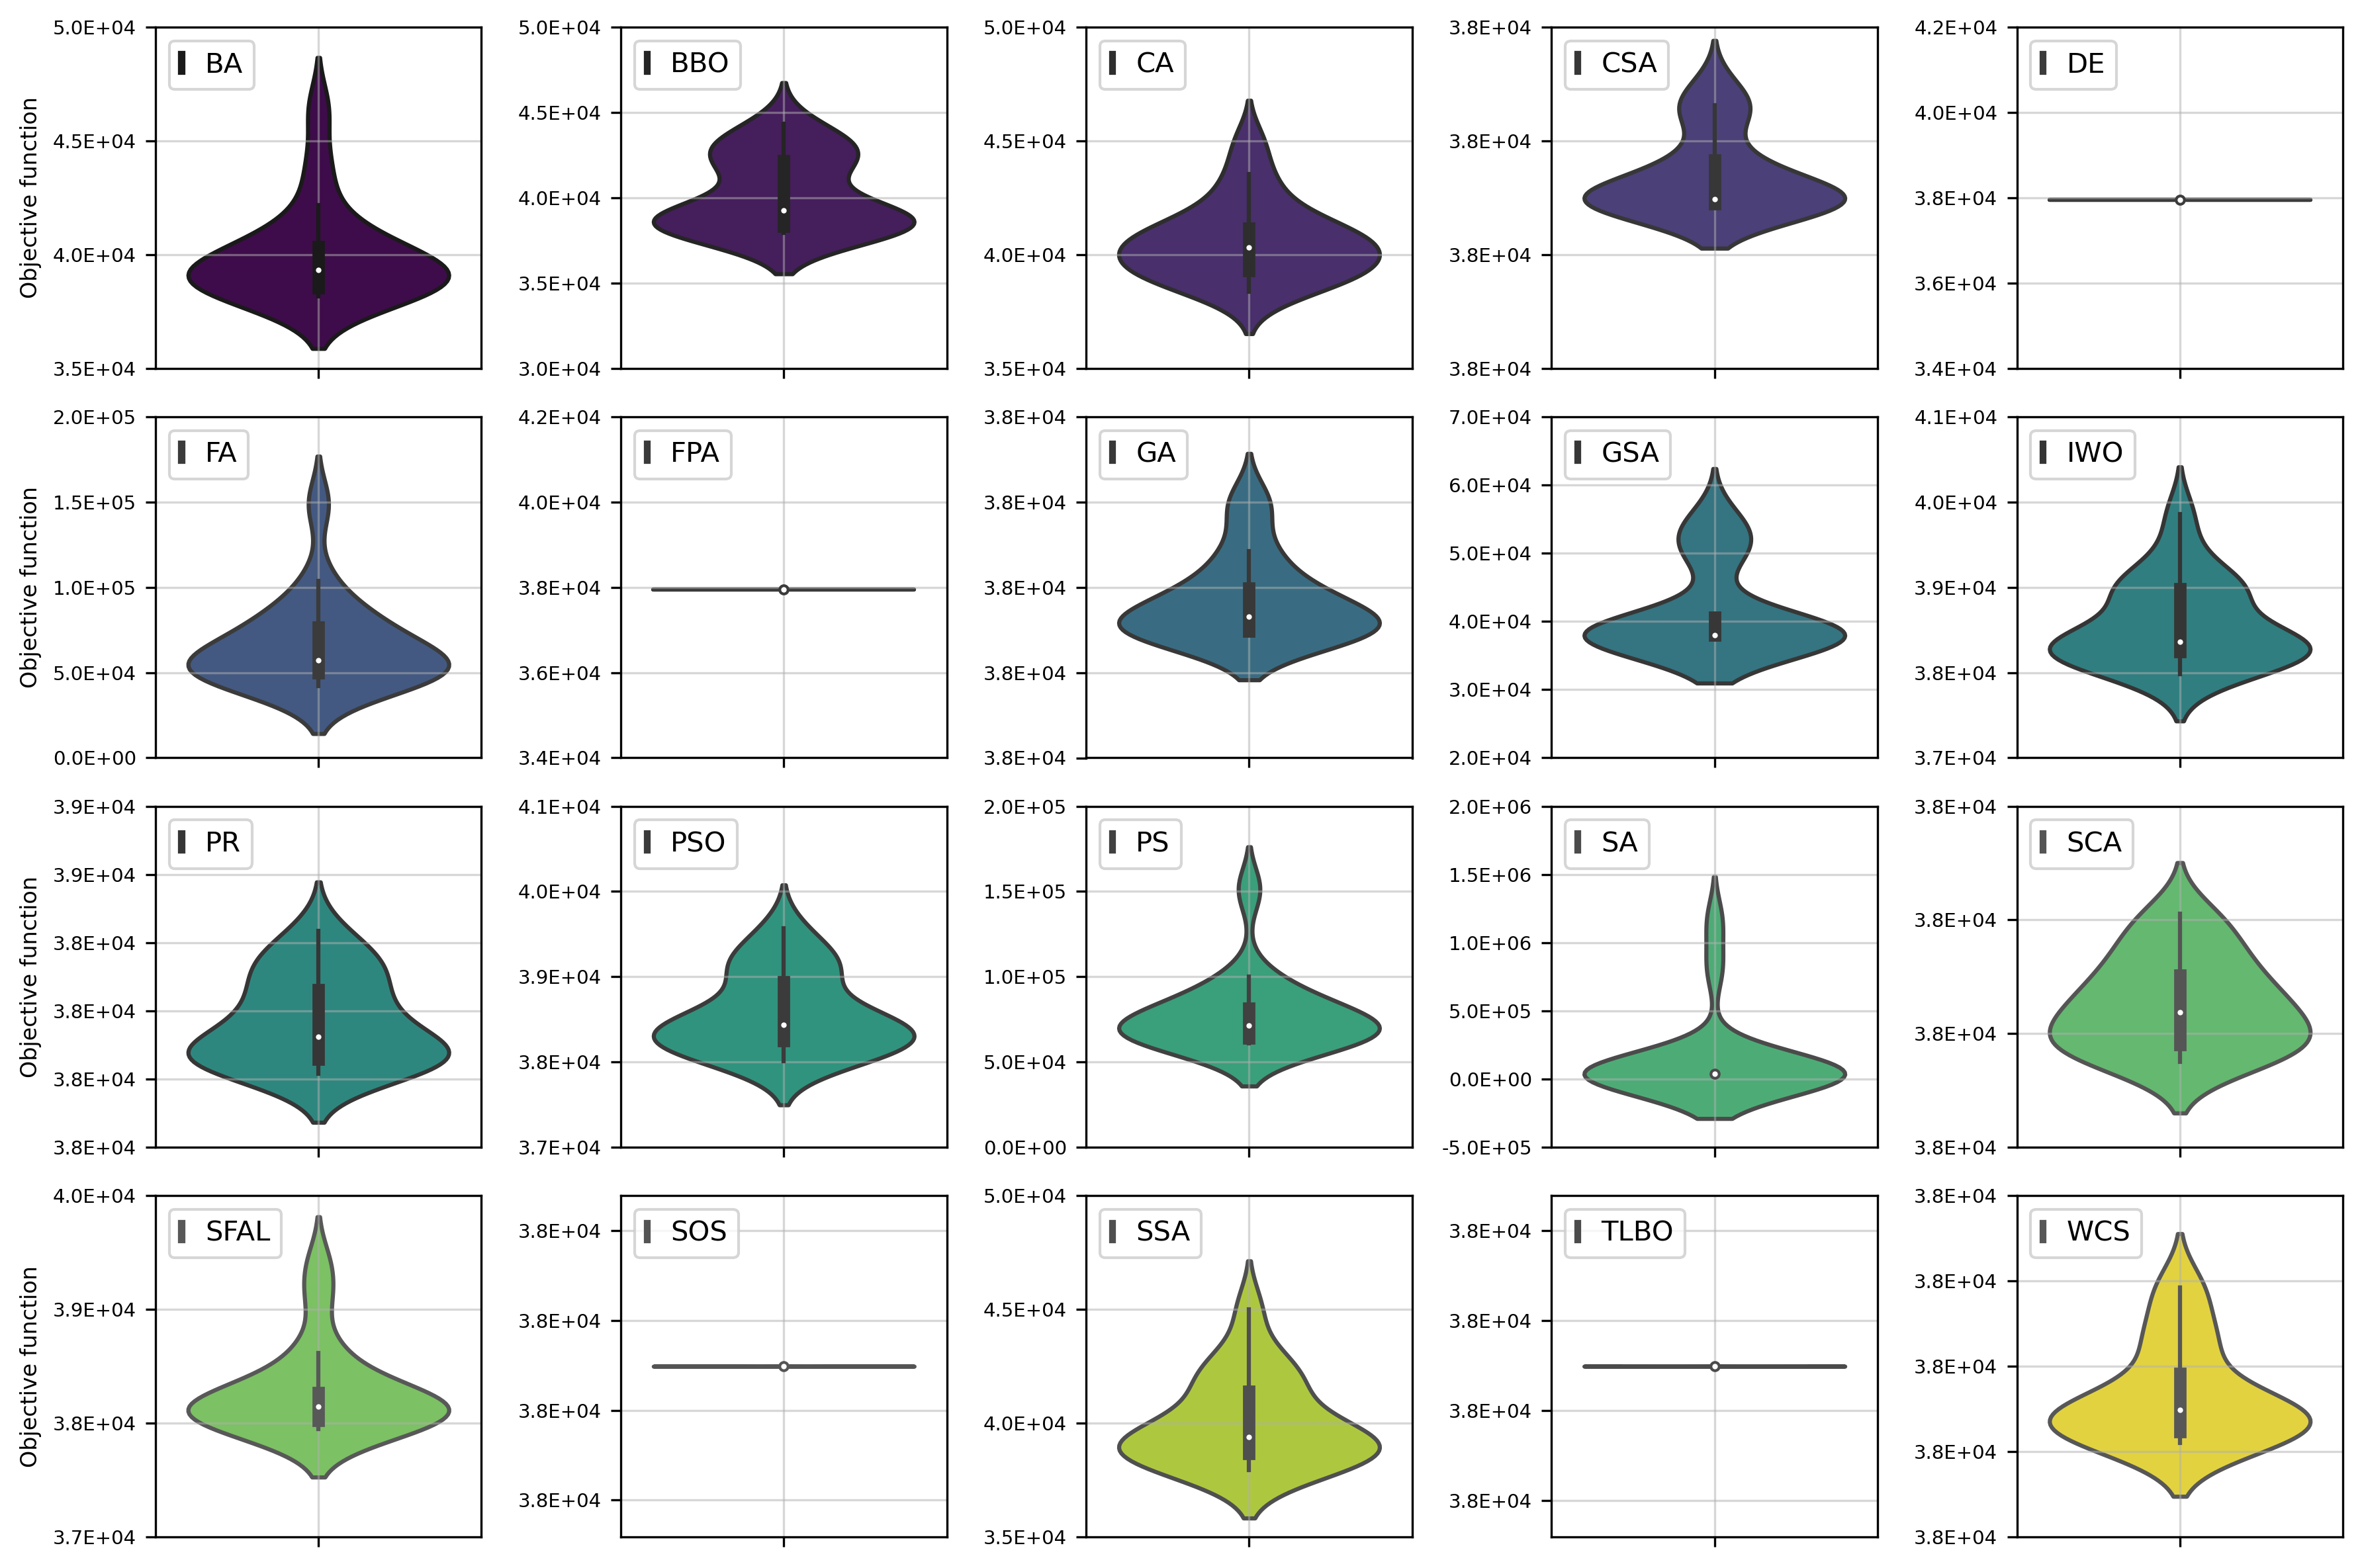

In [24]:
db_name = 'Example_2'
db = eval('of_db_%s'%db_name)
fig = plt.figure(figsize=(12, 8), dpi=300)
num_cols = 5
a, b = divmod(len(alg_names), num_cols)
num_row = a+1 if b!=0 else a
cm = plt.cm.viridis(np.linspace(0,1, len(alg_names)))
for i, alg_name in enumerate(alg_names):
    fig = plt.subplot(num_row, num_cols, i+1)
    fig = sns.violinplot(data=db[alg_name], color=cm[i])
    y_tickes = fig.get_yticks()
    x_tickes = fig.get_xticks()
    new_y_ticks = ['%.1E'%i for i in y_tickes]
    fig = plt.xticks(ticks= x_tickes, labels=[])
    fig = plt.yticks(ticks=y_tickes, labels=new_y_ticks, fontsize=7)
    fig = plt.grid(alpha=.5)
    fig = plt.legend(['%s'%alg_name], handlelength=0.1, frameon=True, loc = 'upper left', fancybox=True)
    if i%num_cols==0:
        fig = plt.ylabel('Objective function', fontsize=8)    
plt.tight_layout()
folder_name = '/0Summary result/Plots/Violin plot/'
output_dir = Path(root_directory+folder_name)
output_dir.mkdir(parents=True, exist_ok=True)
file_name = '%s_of_violinplot.png'%db_name
fig = plt.savefig(output_dir / file_name)

<div class='alert alert-success'>
    <b>STATISTICAL TESTS</b>
</div>

<div class='alert alert-warning'>
    Friedmen Test
</div>

In [26]:
rank_db_raw = list()
db = mean_result
for i in range(len(db)):
    rankings = db.iloc[i,:].rank(method='min').astype(int)
    rank_db_raw.append(rankings)
mean_rank_db = pd.DataFrame(rank_db_raw, columns=db.columns, index = db.index).transpose()
mean_rank_db['Avr_rank'] = mean_rank_db.mean(axis=1)
mean_rank_db['Overall_rank'] = mean_rank_db['Avr_rank'].rank(method='min').astype(int)
folder_name = '/0Summary result/Stat tests/Friedman test/'
output_dir = Path(root_directory+folder_name)
output_dir.mkdir(parents=True, exist_ok=True)
file_name = 'mean_Friedmanrank_result.csv'
mean_rank_db.to_csv(output_dir / file_name)

In [27]:
mean_rank_db

,Example_1,Example_2,Avr_rank,Overall_rank
BA,13,13,13.0,13
BBO,15,15,15.0,14
CA,16,16,16.0,17
CSA,5,6,5.5,5
DE,1,2,1.5,1
FA,18,18,18.0,18
FPA,2,1,1.5,1
GA,7,7,7.0,7
GSA,14,17,15.5,15
IWO,12,12,12.0,12


<div class='alert alert-warning'>
    Wilcox Test
</div>

In [28]:
best_algs = list()
for i in mean_analysis['Best Algorithms']:
    best_algs.extend(i)
best_algs = np.unique(best_algs)
best_algs

array(['DE', 'FPA'], dtype='<U3')

In [29]:
for target in alg_names: 
    confidence_level = .05

    headers = eval('of_db_%s.columns'%ex_name)
    rest_name = [i for i in headers if i != target]
    exec('%s_wilcox = pd.DataFrame(columns=rest_name)'%target)
    for ex_name in ex_list:
        results = list()
        target_val = eval('of_db_%s[target]'%ex_name)
        for alg in rest_name:
            diff = target_val - eval('of_db_%s["%s"]'%(ex_name , alg))
            w, p = wilcoxon(diff, zero_method="zsplit",  method='approx', nan_policy='omit')
            if not (p<confidence_level):
                symbol = '0'
            else:
                w, p = wilcoxon(diff, zero_method="zsplit", alternative='less',  method='approx', nan_policy='omit')
                if p<confidence_level:
                    symbol = '-'
                else:
                    symbol = '+'
            results.append(symbol)  
        exec('%s_wilcox=pd.concat((%s_wilcox, pd.DataFrame(results, index=rest_name).transpose()), ignore_index=True)'
             %(target, target))
    index = ex_list
    eval("%s_wilcox.insert(0,'Function',index)"%target)
    folder_name = '/0Summary result/Stat tests/Wilcox/'
    output_dir = Path(root_directory+folder_name)
    output_dir.mkdir(parents=True, exist_ok=True)
    file_name = '%s_wilcox.csv'%target
    exec("%s_wilcox.to_csv(output_dir / file_name)"%(target))